# Upload and Download Stats

## Parameters

Modify the timeframe and hit Run All to recalculate.

In [37]:
duration='12h'

## Import and reformat data from GraphiteDB

In [34]:
from datetime import datetime
import pandas as pd
import requests as rq
%matplotlib inline
import matplotlib.pyplot as pyplot


url=f"http://graphs.commonjava.org:8000/render?target=house.netspeed.*&format=json&from=-{duration}"
json = rq.get(url).json()

data = {'time': [tstamp for (_,tstamp) in json[0]['datapoints']]}
count=0
for series in json:
    name = series['target'].split('.')[-1]
    for val,_ in series['datapoints']:
        if data.get(name) is None:
            data[name] = []
        
        data[name].append(val/(1024*1024) if val is not None else None)

cols = ['time','download','upload']
for key in list(data.keys()):
    if key not in cols:
        del data[key]

df = pd.DataFrame(data, columns=['time', 'upload', 'download'])
df['time'] = pd.to_datetime(df['time'], unit='s')
df.index=df['time']
del df['time']

## Plot

Text(0, 0.5, 'MBit')

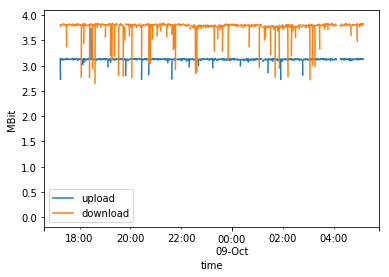

In [35]:
#ax = df.resample('10min').mean().plot()
ax = df.plot()
ax.set_ylabel('MBit')